In [ ]:
# Créditos a Daniel Robles Leong <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.core.pylabtools import figsize

from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Impoorting data from drive
from google.colab import drive

# Conectar con google drive (Es necesario tener la carpeta compartida)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Upload data
csv = ["MNISTtest_9000.csv", "MNISTtrain_40000.csv", "MNISTvalidate_11000.csv"]
carpet = "/content/drive/Shareddrives/SMLE: Guzmán-Santoscoy-Robles/data/"
MNISTtest_9000, MNISTtrain_40000, MNISTvalidate_11000 = [pd.read_csv(carpet + i) for i in csv]

# Creamos una función para separar los datos
def PrePross(df):
  '''
  Separa los dataframes en inputs y outputs
  '''
  input = np.array([np.array(i[1] / 255).reshape(28,28,1)   for i in df.iloc[:,:-1].iterrows()])
  output = to_categorical(pd.Categorical(df.iloc[:,-1]))
  output_lab = np.array(df.iloc[:,-1]).reshape(len(df.iloc[:,-1]), 1)

  return input, output, output_lab

# Separamos los datos
input_train, output_train, lab_train = PrePross(MNISTtrain_40000)
input_test, output_test, lab_test = PrePross(MNISTtest_9000)
validate = MNISTvalidate_11000

In [ ]:
# Arquitectura de la CNN
CNN5 = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

# Optimizador
CNN5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
monitor_val_acc_0 = EarlyStopping(monitor='val_accuracy', patience=4)
modelCheckpoint_0 = ModelCheckpoint("CNN5.hdf5", save_best_only = True)

# Entrenamiento
model_17 = CNN5.fit(input_train, output_train, batch_size=128, epochs=200, validation_split=0.1, callbacks = [monitor_val_acc_0, modelCheckpoint_0])

Epoch 1/200
282/282 [==============================] - 75s 264ms/step - loss: 0.4010 - accuracy: 0.8694 - val_loss: 0.0772 - val_accuracy: 0.9775
Epoch 2/200
282/282 [==============================] - 73s 258ms/step - loss: 0.1095 - accuracy: 0.9659 - val_loss: 0.0485 - val_accuracy: 0.9852
Epoch 3/200
282/282 [==============================] - 72s 254ms/step - loss: 0.0764 - accuracy: 0.9763 - val_loss: 0.0430 - val_accuracy: 0.9868
Epoch 4/200
282/282 [==============================] - 73s 260ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0368 - val_accuracy: 0.9883
Epoch 5/200
282/282 [==============================] - 71s 253ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 6/200
282/282 [==============================] - 71s 253ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0283 - val_accuracy: 0.9915
Epoch 7/200
282/282 [==============================] - 73s 260ms/step - loss: 0.0403 - accuracy: 0.9866 - val_loss: 0.0283 -

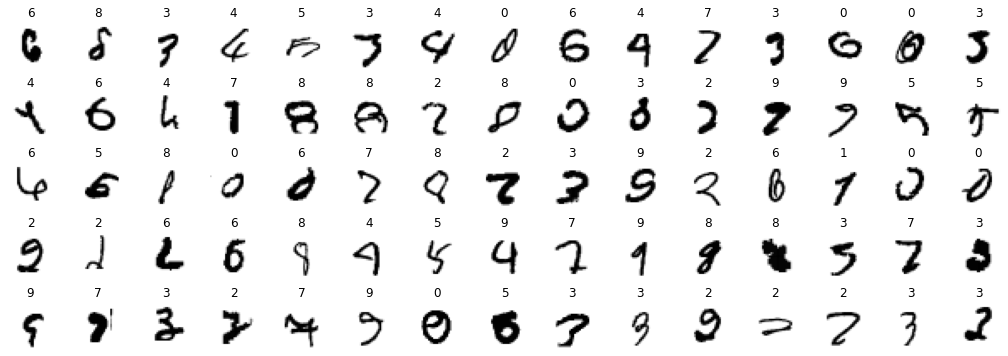

In [ ]:
# Guardamos nuestras predicciones y la etiqueta correspondiente
pred_id = [i.argmax() for i in CNN5.predict(input_test)]
pred_prob = CNN5.predict(input_test)

# Encontramos nuestros errores
compare = lab_test.squeeze() != np.array(pred_id)
index_error = np.where(compare)[0]

# Guardamos nuestras predicciones y la etiqueta correspondiente de nuestros errores
hard_prediction = [input_test[i] for i in index_error]
hard_prediction_prob = [pred_prob[i] for i in index_error]

#_______________________________________________________________________________
# Columnas y renglones de la grafica
n_rows = 5
n_cols = 15

# Nombres
class_names = [i for i in range(10)]
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Creamos la grafica
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(hard_prediction[index].reshape(28,28), cmap="binary")
        plt.axis('off')
        plt.title(lab_test[index_error][index].squeeze(), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# Graficas individuales
def get_graph(n_fig):
  fig = plt.figure()
  # titulo de la grafica
  plt.title(lab_test[n_fig].squeeze(), fontsize=24)
  plt.axis("off")

  # tamaño de la grafica
  fig.set_figheight(3) 
  fig.set_figwidth(3)
  
  # dimensiones de la grafica
  spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[2, 0.4], wspace=0)

  # grafica del digito
  ax0 = fig.add_subplot(spec[0])
  ax0.imshow(input_test[n_fig].reshape(28,28), cmap="binary")
  ax0.axis('off')

  # grafica de probabilidades
  ax1 = fig.add_subplot(spec[1])
  ax1.barh(range(10), pred_prob[n_fig], tick_label = np.array(range(0,10)), color = "black")

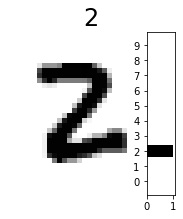

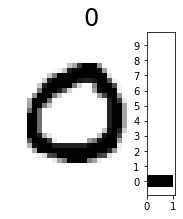

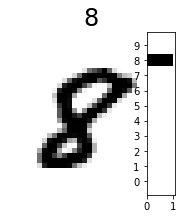

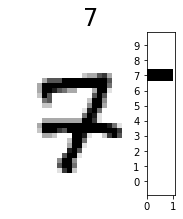

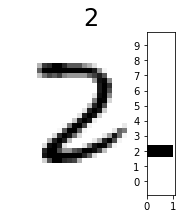

In [ ]:
for i in range(5):
  get_graph(i)

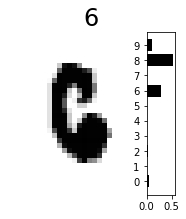

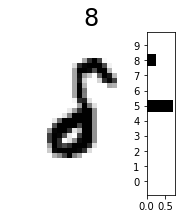

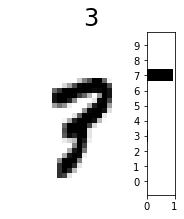

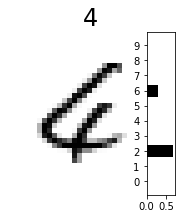

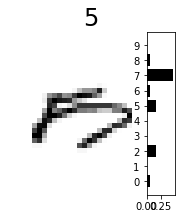

In [ ]:
for i in index_error[:5]:
  get_graph(i)